In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping  # Corrected import for EarlyStopping
from sklearn.datasets import make_circles
import seaborn as sns


In [36]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)


<Axes: >

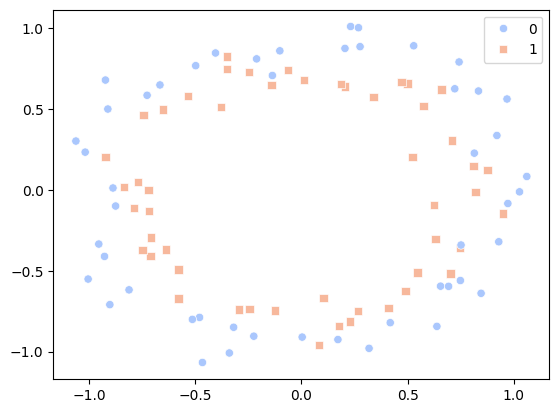

In [37]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', style=y, markers=["o", "s"])


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
# Initialize the Sequential model
model = Sequential()

# Add input layer and first hidden layer with 10 neurons, ReLU activation
model.add(Dense(10, input_dim=2, activation='relu'))  # input_dim=2 since we have two features (for make_circles dataset)

# Add additional hidden layers (optional)
model.add(Dense(10, activation='relu'))  # Another hidden layer with ReLU activation
model.add(Dense(10, activation='relu'))  # Another hidden layer

# Output layer (for binary classification, use 1 unit with 'sigmoid' activation)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

c:\Users\sayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
early_stopping = EarlyStopping(monitor='val_loss', patience=500,verbose=1,baseline=None,restore_best_weights=False)


In [42]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4825 - loss: 0.6988 - val_accuracy: 0.7000 - val_loss: 0.6854
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4608 - loss: 0.7020 - val_accuracy: 0.5500 - val_loss: 0.6886
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4409 - loss: 0.6970 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5129 - loss: 0.6922 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5287 - loss: 0.6920 - val_accuracy: 0.4000 - val_loss: 0.6963
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5081 - loss: 0.6928 - val_accuracy: 0.3500 - val_loss: 0.6989
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4919 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss: 0.7009
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4980 - loss: 0.6897 - val_accuracy: 0.3500 - va

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 794us/step


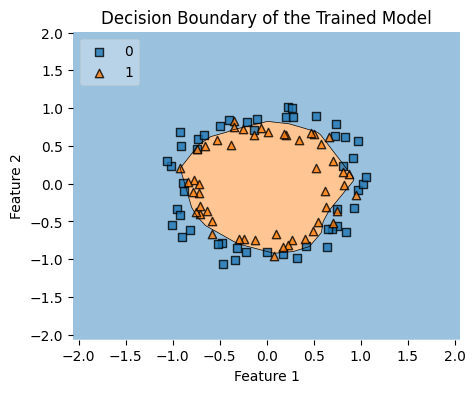

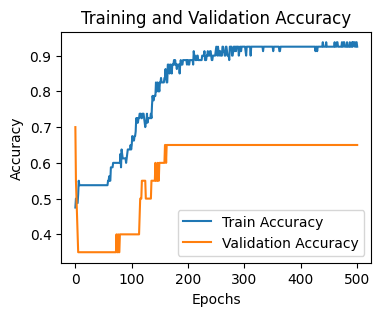

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title('Decision Boundary of the Trained Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Ploting the training and validation accuracy to check how well the model trained
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()